# Project 1-Investigate a Dataset (Investigate a TMDb movie Database)

<strong>This project made use of the TMDb movie Dataset, which contains approximately 10,000 movies gathered from TMDb. Each movie included information on its user rating, income, actors, genres, and so on. The purpose of this analysis is to examine information about movie features in order to help the movie industry earn more money.<br></strong>

<h3>Data set Contain:</h3>

Total Rows = 10866 <br>
Total Columns = 21 


<h3>The project's steps are as follows:</h3><br>
1. Evaluate the Data: Save and upload the file.<br>
2. Data Wrangling: Remove unnecessary data such as empty and duplicate values.<br>
3. Exploratory Data Analysis: Study statistics and create visualizations to identify the relationships between variables.<br>
4. Communicate the results: Use findings to answer questions, then write a conclusion.

<h3>Questions to be answered:</h3><br>
1. Which are the most profitable movies on the market?<br>
2. How Does Popularity Affect Profit?<br>
3. In which years do movies make the most money?<br>
4. Which genre has the highest number of movies?<br>
5. What is the top cast?

In [1]:
# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt

In [2]:
# Load tmdb csv file and preview the first 5 rows
df = pd.read_csv('C:\\anaconda3\\Lib\\site-packages\\sklearn\\datasets\\data\\tmdb_movies.CSV')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
# Previous data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# Preview stats for each columns
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# Data Wrangling

In [6]:
#Check for any duplicated rows.
df.duplicated().sum()

1

In [7]:
#drop duplicated rows.
df.drop_duplicates(inplace = True)

In [8]:
#Check for any duplicated rows.
df.duplicated().sum()


0

<strong>After I looked at the questions I want to answer, I notice that we don't need all of the columns, therefore I decided to drop unnecessary columns to make work easier.<strong>

In [9]:
# Delete unnecessary columns
df.drop(['id', 'imdb_id','budget_adj', 'revenue_adj', 'homepage', 'keywords', 'tagline',
                              'overview', 'production_companies', 'vote_count','director','vote_average','runtime','release_date'], axis=1, inplace=True)

In [10]:
# Check remaining columns 
df.head(1)

,popularity,budget,revenue,original_title,cast,genres,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,2015


In [11]:
#Check for data type.
df.dtypes

popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
genres             object
release_year        int64
dtype: object

array([[<AxesSubplot: title={'center': 'popularity'}>,
        <AxesSubplot: title={'center': 'budget'}>],
       [<AxesSubplot: title={'center': 'revenue'}>,
        <AxesSubplot: title={'center': 'release_year'}>]], dtype=object)

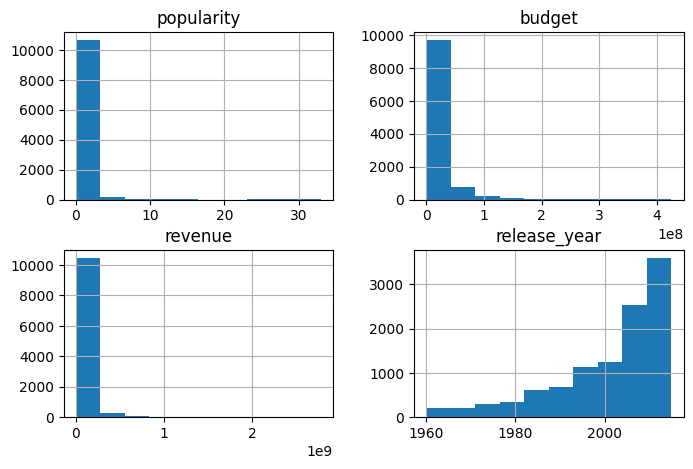

In [12]:
df.hist(figsize=(8,5))

In [13]:
# Check for null values. 
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
genres            23
release_year       0
dtype: int64

In [14]:
df.shape

(10865, 7)

<strong>The dataset has 10,865 rows and 99 have missing values, if the rows with missing values are dropped it won't affect at all, so I choose to drop these rows</strong>

In [15]:
#drop all rows have null value.
df=df.dropna()

In [16]:
# Check for null values. 
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
genres            0
release_year      0
dtype: int64

In [17]:
df.shape

(10767, 7)

# Exploratory Data Analysis

<strong>After cleaning the data and removing any unnecessary information that might have an impact on the data set. The data is now ready to be utilized to answer questions, study statistics, and create visualizations to explore relationships.</strong>

<h3>Question 1. Which are the most profitable movies on the market?</h3>

In [18]:
# Create new column for the profit .
df['profit'] = df['revenue'] - df['budget']

df.head(1)

,popularity,budget,revenue,original_title,cast,genres,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,2015,1363528810


In [19]:
# Check profit column data type 
df.dtypes

popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
genres             object
release_year        int64
profit              int64
dtype: object

In [20]:
# Sort the data by profit and show the top 10 rows.
df.sort_values(['profit'], ascending = False).head(10)

,popularity,budget,revenue,original_title,cast,genres,release_year,profit
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Action|Adventure|Fantasy|Science Fiction,2009,2544505847
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,2015,1868178225
5231,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,Drama|Romance|Thriller,1997,1645034188
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,2015,1363528810
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,2015,1316249360
4361,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Science Fiction|Action|Adventure,2012,1299557910
3374,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,Adventure|Family|Fantasy,2011,1202817822
14,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Action|Adventure|Science Fiction,2015,1125035767
5422,6.112766,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Animation|Adventure|Family,2013,1124219009
8094,1.136610,22000000,1106279658,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Crime|Drama|Mystery|Thriller|Action,1995,1084279658


<h4>The top ten movies in profit are listed above.<h4>

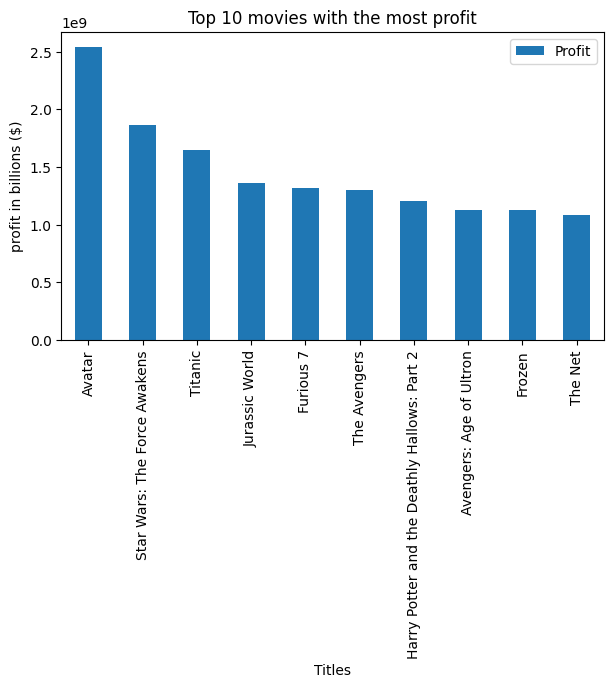

In [21]:
# Create a bar graph for the top 10 most profitable movies 
# Sort the raw data by the profit.
sorted_profit = df['profit'].sort_values(ascending=False)[:10]

# Create title and profit lists that will be used as X-axis and Y-axis values in bar graph.
high_profit=pd.DataFrame()
titles=[]
profit=[]

# Fill the vallues from raw data to the lists.
for i in sorted_profit.index:
    titles.append(df.loc[i,'original_title'])
    profit.append(sorted_profit.loc[i])
high_profit['Titles']=titles
high_profit['Profit']=profit
high_profit.set_index('Titles',inplace=True)

# Plot
high_profit.plot(kind ='bar',figsize=(7,4))
plt.title('Top 10 movies with the most profit');
plt.ylabel('profit in billions ($)');


<h3>Question 2. How Does Popularity Affect Profit?</h3>

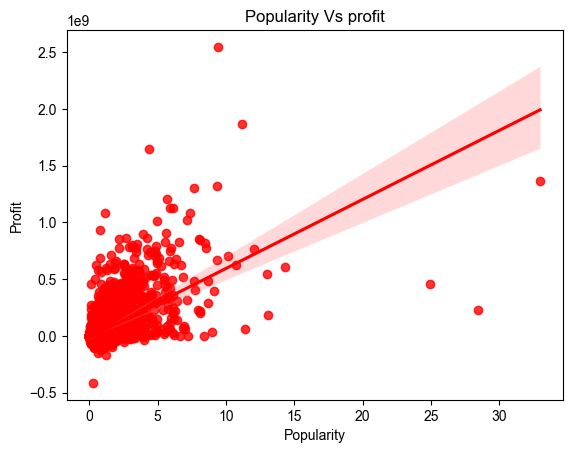

In [22]:
# Create a scatter plot to study relationship between popularity and porfit.
popularity_vs_profit= sns.regplot(x=df['popularity'],y=df['profit'],color='r')

#setup the title and the labels of the scatter plot.
popularity_vs_profit.set_title("Popularity Vs profit")
popularity_vs_profit.set_xlabel("Popularity")
popularity_vs_profit.set_ylabel("Profit")

#setup the figure size.
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("whitegrid")



<h3>Question 3. In which years do movies make the most money? </h3>

In [23]:
# First group total profit by each years
profit_year = df.groupby('release_year')['profit'].sum()
profit_year.head(10)

release_year
1960    122948052
1961    291583188
1962    160857720
1963    114073489
1964    301498621
1965    387876739
1966     27181889
1967    637182637
1968    192793980
1969    201827989
Name: profit, dtype: int64

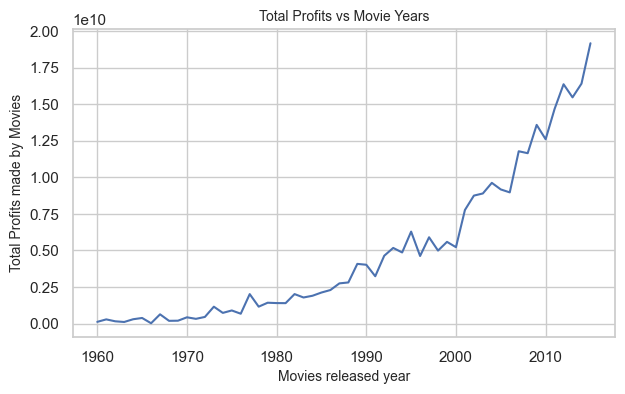

In [24]:
# plot the above query.
profit_year.plot(figsize = (7,4))
plt.xlabel('Movies released year', fontsize = 10)
plt.ylabel('Total Profits made by Movies', fontsize = 10)
plt.title('Total Profits vs Movie Years', fontsize = 10);

<h4> As the plot shows, Profits increase over time.<h4>

<h3>Question 4. Which genre has the highest number of movies??</h3>


In [25]:
df.genres.unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

In [26]:
#  create function to split data and return count.

def split_data(column_name):
    
    data = df[column_name].str.cat(sep = '|')
    
    # StorE the values separately as series
    data = pd.Series(data.split('|'))

    count = data.value_counts()
    
    return count

In [27]:
# Use the function for the genres.
genres_count =  split_data('genres')

In [28]:
genres_count.value_counts

<bound method IndexOpsMixin.value_counts of Drama              4752
Comedy             3785
Thriller           2905
Action             2381
Romance            1712
Horror             1637
Adventure          1469
Crime              1354
Science Fiction    1227
Family             1219
Fantasy             911
Mystery             809
Animation           669
Documentary         478
Music               405
History             331
War                 268
Foreign             187
TV Movie            167
Western             165
dtype: int64>

Text(0.5, 0, 'Genres')

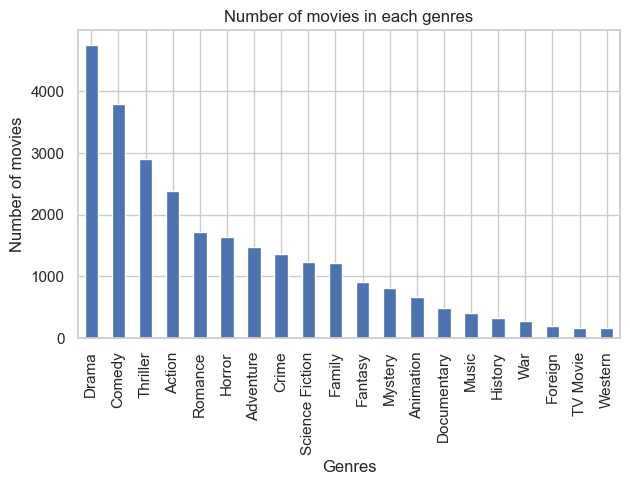

In [29]:
# Plot 
genres_count.plot(kind ='bar',figsize=(7,4))
plt.title('Number of movies in each genres');
plt.ylabel('Number of movies');
plt.xlabel("Genres")

<h4>As it appears in plot drama has the largest number of movies<h4>

<h3>Question 5. What are the top casts?</h3>

In [30]:
df.cast.unique()

array(["Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson",
       'Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman',
       'Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller',
       ...,
       'Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Zhzhyonov|Olga Aroseva|Lyubov Dobrzhanskaya',
       'Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|John Sebastian|Tadao Nakamaru',
       'Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|Stephanie Nielson'],
      dtype=object)

In [31]:
# Using split_data function for the cast column.
Casts_count =  split_data('cast')


In [32]:
Casts_count.value_counts

<bound method IndexOpsMixin.value_counts of Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
                     ..
Akeem Smith           1
Elisha Skorman        1
Deborah Valente       1
Chord Overstreet      1
Stephanie Nielson     1
Length: 18983, dtype: int64>

In [33]:
# print 10 top cast.
Casts_count.head(10)

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
John Goodman         49
Morgan Freeman       49
Liam Neeson          48
dtype: int64

# Conclusions

<h3> Result<br> <br>
1. The 'Avatar' movie generated the most profit overall, totaling over 2.5 billion.<br><br>
2. A movie with high popularity usually tends to earn high profit.<br><br>
3. Profits increase throughout the year.<br><br>
4. Drame, Comedy, and Thriller are the three most-made genres.<br><br>
5. Top 1 cast is Robert De Niro<h3>

<h3>Limitations<br><br>
 First we are unsure whether the data provided to us is correct and up to date and the budget and income columns lack currency units; it is feasible that various movies have budgets in different currencies depending on the country in which they are produced. As a result, a discrepancy occurs, which may make the entire analysis incorrect.</h3>